<a href="https://colab.research.google.com/github/elisabm/deeplearning/blob/main/Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning 

Elisa Bonilla 

A01028576

Detección de frutas


In [2]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import opendatasets as od
import pandas
  
od.download(
    "https://www.kaggle.com/datasets/hasibalmuzdadid/shoe-vs-sandal-vs-boot-dataset-15k-images")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: elisabonillama
Your Kaggle Key: ··········


100%|██████████| 47.0M/47.0M [00:03<00:00, 15.9MB/s]


In [4]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator # untuk data augemntations
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, Input, Dense, Flatten, MaxPooling2D
from tensorflow.keras import Sequential

In [5]:
dir = "shoe-vs-sandal-vs-boot-dataset-15k-images/Shoe vs Sandal vs Boot Dataset"

datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect',
    validation_split=0.2 
)


In [6]:
train_im = datagen.flow_from_directory(
    dir,
    batch_size=64,
    target_size=(128,128),
    class_mode="categorical",
    subset="training"
)

Found 12000 images belonging to 3 classes.


In [7]:
val_im = datagen.flow_from_directory(
    dir,
    batch_size=64,
    target_size=(128,128),
    class_mode="categorical",
    subset="validation",
)

Found 3000 images belonging to 3 classes.


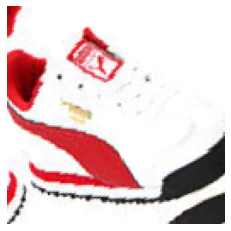

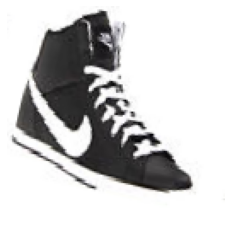

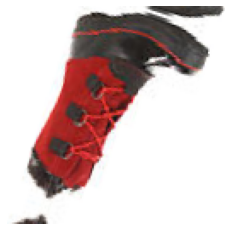

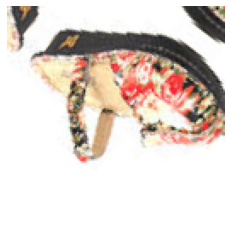

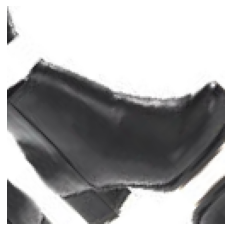

In [8]:

#ver data
for i in range(5):
    img, label = train_im.next()
    plt.imshow(img[0])
    plt.axis('off')
    plt.show()

In [9]:
model = Sequential()

#layer 1 CNN
model.add(Conv2D(filters = 16, kernel_size = (5,5),padding = 'Same',
                 activation ='relu', input_shape = (128,128,3)))

#filters: cuantas caracteristicas empieza a diferenciar la red
#kernel_size: la matriz q usamos para filtrar
#padding: es el mismo para evitar q todos los pixeles contribuyan de una manera similar
#activation: usamos rectifies linear activation
#input_shape: tamaño de img y 3 xq es rgb 


model.add(MaxPooling2D(pool_size=(2,2)))



In [10]:

#layer 2 CNN
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#layer 3 CNN
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


#layer 4 CNN
model.add(Conv2D(filters = 128, kernel_size = (3,3),padding = 'Same',
                 activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


In [11]:

# fully connected
model.add(Flatten())


model.add(Dense(500, activation = "relu"))

model.add(Dense(3, activation = "softmax"))

 # usamos softmax para q la ultima capa nos de la probability distribution over predicting classes. 
# The output of Softmax is in probabilities of each possible outcome for predicting class.


model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#loss: se utiliza normalmente en problemas de clasificacion
#minimiza la funcion

In [12]:
history = model.fit(
    train_im,
    validation_data=val_im,
    epochs=50,
    steps_per_epoch=len(train_im),
)

Epoch 1/50
188/188 [==============================] - 69s 313ms/step - loss: 0.8041 - accuracy: 0.6112 - val_loss: 0.5071 - val_accuracy: 0.7577
Epoch 2/50
188/188 [==============================] - 57s 304ms/step - loss: 0.4576 - accuracy: 0.8042 - val_loss: 0.3456 - val_accuracy: 0.8637
Epoch 3/50
188/188 [==============================] - 57s 306ms/step - loss: 0.3465 - accuracy: 0.8613 - val_loss: 0.2925 - val_accuracy: 0.8867
Epoch 4/50
188/188 [==============================] - 59s 315ms/step - loss: 0.2748 - accuracy: 0.8961 - val_loss: 0.2398 - val_accuracy: 0.9077
Epoch 5/50
188/188 [==============================] - 58s 310ms/step - loss: 0.2275 - accuracy: 0.9183 - val_loss: 0.2174 - val_accuracy: 0.9167
Epoch 6/50
188/188 [==============================] - 58s 307ms/step - loss: 0.1959 - accuracy: 0.9281 - val_loss: 0.2142 - val_accuracy: 0.9177
Epoch 7/50
188/188 [==============================] - 57s 305ms/step - loss: 0.1870 - accuracy: 0.9313 - val_loss: 0.1749 - val_ac

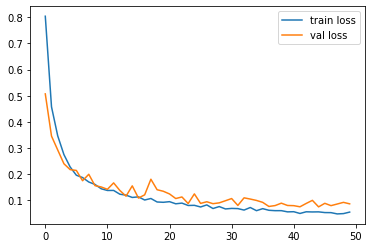

<Figure size 432x288 with 0 Axes>

In [13]:
acc = history.history['accuracy']                                                 
val_acc = history.history['val_accuracy']                                         
loss = history.history['loss']                                                    
val_loss = history.history['val_loss']                                            

epochs = range(len(acc)) 


plt.plot(loss, label='train loss')
plt.plot(val_loss, label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')




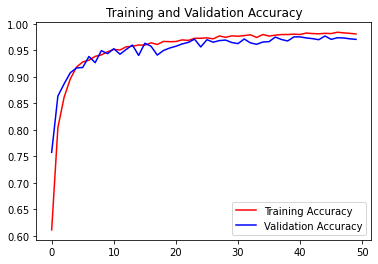

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [14]:
   
plt.plot(epochs, acc, 'r', label='Training Accuracy')                                                 
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')                          
plt.title('Training and Validation Accuracy')                                        
plt.legend(loc=0)                                                                 
plt.figure()                                                                      
plt.show()  
plt.savefig('AccVal_acc')                                                    
